# Used Symbols & Description:
|Symbol          |Name                                               |Description                                                                                |
|:--------------:|:-------------------------------------------------:|:-----------------------------------------------------------------------------------------:|
|$x$             |Input                                              |Data from dataset passed to the training model                                             |
|$w$             |Weight                                             |Learnable parameters                                                                       |
|$b$             |Bias                                               |Errornous assumptions in the learning process                                              |
|$z$             |Net input                                          |Accumulated sum of input values                                                            |
|$t$             |Transpose                                          |Converts a row-vector to a col-vector and vice-versa                                       |
|${\theta}$      |Threshold                                          |Chooses when to turn a projected probability or score into a class label                   |
|${\eta}$        |Learning rate (Typically a const between 0.0 & 1.0)|Determines the step size at each iteration while moving toward a minimum of a loss function|
|$ø(z)$          |Decision/Activation function                       |Helps the ANN learn complex patterns, and decides what should be passed to the next neuron |
|$y^{(i)}$       |True class label of the i'th training example      |The correct class label contained inside the dataset (Supervised Learning)                 |
|$\hat{y}^{(i)}$ |Predicted class label of the i'th training example |The predicted class label based on the highest scoring epoch                               |
|${\triangle}w_j$|Update value                                       |Decides if the weight should be negated or increased (1 or -1)                             |
|$x_j^{(i)}$     |Multiplicative factor                              |A number or symbol multiplied with a variable or an unknown quantity                       |
|$w^tx$          |Vector dot product                                 |Takes two equal-length sequences of numbers, and returns a single number                   |
|$\mathbb{R}^{m+1}$| Vector                                          |$\mathbb{R}$ = Real number, m = Amount of dimensions, add 1 for the first element in vector (bias unit)| 
# Learning model notes
1. With the perceptron learning rule, Rosenblatt proposed an algorithm that would automatically learn the optimal weight coefficients that would then be multiplied with the input features in order to make the decision of wether the neuron should fire or not.

2. In the context of supervised learning and classifications, such an algorithm could not be used to predict whether a new data point belongs to one class or another.

3. We can put the idea behind artificial neurons into the context of a binary classification task where we refer to our two classes as 1 (positive class) and -1 (negative class) for simplicity.

4. We can then define a decision function $ø(z)$ that takes a linear combination of certain input values, $x$, and a corresponding weight vector $w$, where $z$ is called the net-input: 
* $\mathbf{z} = w_{1},x_{1} + w_{2},x_{2} + w_{3},x_{3} + ... + w_{m} + x_{m} $

5. If the net input of the particular example $x^{(i)}$, is greater than a defined threshold, ${\theta}$, we predict class 1, and class -1 otherwise.

6. In the perceptron algorithm, the decision function, $ø(^.)$, is a variant of a unit step function:
* $ø(z) = 1 $ if $ z \ge 0, $ else $ -1$

7. For simplicity, we can bring the threshold, ${\theta}$, to the left side of the equation and define a weight-zero as $w_0 = -{\theta}$ and $x_0 = 1$ so we write $z$ in a more compact form:
* $z = w_0,x_0 + w_1,x_1 + ... + w_m,x_m = w^t x$

8. The negative threshold , or weight $w_0 = -{\theta}$ is usually called the bias unit.

9. Class label predicted by the unit step function, and the simultaneous update of each weight, $w_j$, in the weight vector, $w$, can be formally written as:
* $w_j := w_j + {\triangle}w_j$

10. The update or change value of $w_j$, which we refere to as ${\triangle}w_j = {\eta}(y^{(i)} - \hat{y})x_j^{(i)}$
* Note: All weights in the weight vector are being updatet simultaneously.

11. Example of 2-dimensional dataset update:
* ${\triangle}w_0 = {\eta}(y^{(i)} - output^{(i)})$
* ${\triangle}w_1 = {\eta}(y^{(i)} - output^{(i)})x_1^{(i)}$
* ${\triangle}w_2 = {\eta}(y^{(i)} - output^{(i)})x_2^{(i)}$

12. Example of update value with correct prediction:
* $y^{(i)} = -1, \quad {\eta}(y^{(i)} = -1, \quad {\triangle}w_j = {\eta(-1-(-1))x_j^{(i)}} = 0$
* $y^{(i)} = 1, \quad {\eta}(y^{(i)} = 1, \quad {\triangle}w_j = {\eta(1-1)x_j^{(i)}} = 0$

13. Example of update value with incorrect prediction:
* $y^{(i)} = 1, \quad {\eta}(y^{(i)} = -1, \quad {\triangle}w_j = {\eta(-1-(-1))x_j^{(i)}} = {\eta(2)x_j^{(i)}}$
* $y^{(i)} = -1, \quad {\eta}(y^{(i)} = 1, \quad {\triangle}w_j = {\eta(1-1)x_j^{(i)}} = {\eta(-2)x_j^{(i)}}$

In [13]:
%matplotlib inline

import os
import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import preprocessing, datasets
from sklearn.neighbors import KNeighborsClassifier

plt.style.use("ggplot")

# Load and process dataset
1. Load Iris dataset from URL into pandas vector.
2. Preprocess the data to make us able to use it with our models.
3. Select the true label (predict variable) which we will try to predict.
4. Initialize our X & y variables with the processed data, ready to train & predict on. 

In [14]:
iris = os.path.join("https://archive.ics.uci.edu", "ml", "machine-learning-databases", "iris", "iris.data")
data = pd.read_csv(iris, header=None, encoding="utf-8")

proc = preprocessing.LabelEncoder()
sepal_length = proc.fit_transform(list(data[0]))
sepal_width = proc.fit_transform(list(data[1]))
petal_length = proc.fit_transform(list(data[2]))
petal_width = proc.fit_transform(list(data[3]))
species = proc.fit_transform(list(data[4]))

predict = 4 # Species 

x = list(zip(sepal_length, sepal_width, petal_length, petal_width))
y = list(species)

# Train and predict species

## Prediction Method:
1. Pass our preprocessed data X & y to sklearn to split the data into 4 arrays, where 70% of the data go to training and 30% go to test.
2. Selection of the K-Nearest Neighbour algorighm since our dataset is clustered data.
3. Pass training data to the fit method which do all the training and predictions.
4. Append each prediction accuracy to a list we use in the output.
5. Save the highest and lowest prediction accuracies for the output.
6. Instantiate the prediction of our model to a variable used for the output.
7. Append each concatenaded string of prediction, true label (actual species), prediction accuracy & actual data to a list used for the output.

## Accumulate Accuracies Method:
1. Remove the 2 first and last results of our prediction accuracies to eleminate the chance of data noice. (bad data which pollute the predictions and accuracies)
2. Accumulate the remaining accuracies to get the average accuracy.

In [15]:

class PredictionAndAccurracies(object):
    def __init__(self):
        self.results = []
        self.accuracies = []
        self.best = 0
        self.worst = 100
        self.total_acc = 0

        self.prediction()
        self.accumulate_accuracies()
        self.print_predictions()

    
    def __str__(self):
        return str(f"Best Accuracy:    {round((self.best * 100), 2)}%\n"\
                   f"Worst Accuracy:   {round((self.worst * 100), 2)}%\n"\
                   f"Average Accuracy: {round((self.total_acc * 100), 2)}%\n")


    def prediction(self):
        """ Returns list of the results produced for each prediction """
        self.variations = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
    
        for i in range(100):
            x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.7)
            
            model = KNeighborsClassifier(n_neighbors=5)
            model.fit(x_train, y_train)

            accuracy = model.score(x_test, y_test)
            self.accuracies.append(accuracy)

            if accuracy > self.best:
                self.best = accuracy
            elif accuracy < self.worst:
                self.worst = accuracy
            
            prediction = model.predict(x_test)
            self.results.append(f"Prediction:\t{self.variations[prediction[i]].ljust(10)}"\
                                f"\t\tActual: {self.variations[y_test[i]].ljust(10)}"\
                                f"\t\tAccuracy: {str(round(accuracy * 100, 2)).ljust(5)}%"\
                                f"\tData: {x_test[i]}")        

    def accumulate_accuracies(self):
        """ Calculates the total accuracy of the predictions minus the 2 fist and last predictions """
        del self.accuracies[:3]
        del self.accuracies[97:]

        for acc in self.accuracies:
            self.total_acc += acc

        self.total_acc = self.total_acc / len(self.accuracies)

    def print_predictions(self):
        for result in self.results:
            print(result)

if __name__ == "__main__":
    print(PredictionAndAccurracies())

Prediction:	Iris-setosa		Actual: Iris-setosa		Accuracy: 98.1 %	Data: (7, 14, 6, 5)
Prediction:	Iris-virginica		Actual: Iris-virginica		Accuracy: 97.14%	Data: (28, 9, 35, 17)
Prediction:	Iris-setosa		Actual: Iris-setosa		Accuracy: 96.19%	Data: (11, 13, 5, 3)
Prediction:	Iris-versicolor		Actual: Iris-versicolor		Accuracy: 96.19%	Data: (12, 3, 14, 7)
Prediction:	Iris-virginica		Actual: Iris-virginica		Accuracy: 93.33%	Data: (17, 1, 26, 11)
Prediction:	Iris-setosa		Actual: Iris-setosa		Accuracy: 91.43%	Data: (6, 10, 5, 0)
Prediction:	Iris-virginica		Actual: Iris-virginica		Accuracy: 96.19%	Data: (25, 9, 31, 17)
Prediction:	Iris-versicolor		Actual: Iris-versicolor		Accuracy: 97.14%	Data: (14, 7, 17, 9)
Prediction:	Iris-virginica		Actual: Iris-virginica		Accuracy: 96.19%	Data: (32, 9, 40, 17)
Prediction:	Iris-versicolor		Actual: Iris-versicolor		Accuracy: 97.14%	Data: (25, 7, 24, 10)
Prediction:	Iris-virginica		Actual: Iris-virginica		Accuracy: 94.29%	Data: (26, 11, 33, 19)
Prediction:	Iris-

# Graphical illustration

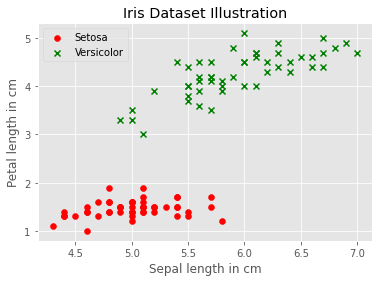

In [16]:
y = data.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", -1, 1)
X = data.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="Setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="green", marker="x", label="Versicolor")
plt.title("Iris Dataset Illustration")
plt.xlabel("Sepal length in cm")
plt.ylabel("Petal length in cm")
plt.grid(True)
plt.legend()


# Perceptron training model
1. The Perceptron receives the inputs of, $x_n$ and multiplies them with the weights, $w_n$, which is accumulated to create the net input, $\sum$.
2. The net input is then passed on to the threshold/activation function, $\theta$, which generates a binary output of -1 or +1. (The predicted class label)
3. This output is used to calculate the error of the prediction and update the weights.

![Perceptron Illustration](perceptron.jpg "Perceptron")

* Perceptron learning algorithm:
    1. Initialize the weights to 0 or a small random number.
    2. For each training example, $x_n$:
        1. Compute the output value, $\hat{y}$, (Y-hat).
        2. Update the weights.

## Fit-Method:
1. Initialize the weights in self.w_ to a vector, $\mathbb{R}^{m+1}$ (self.w_[0] is the bias unit)
2. A NumPy random number generator that is seeded with a user-specified random seed so that we can reproduce previous results if desired.
3. We dont initialize the weights to 0 because the learning rate only has an effect on the classification outcome if the weights are initialized to non-zero values. If all weights are initialized to zero, the learning rate parameter affects only the scale of the weight vector, not the direction.
4. The method loops over all individual examples in the training dataset and updates the weights according to the perceptron learning rule.



In [17]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta                      # Learning rate
        self.n_iter = n_iter                # Epochs
        self.random_state = random_state    # Random weight initialization
    
    def fit(self, X, y):
        rand = np.random.RandomState(self.random_state)                     
        self.w_ = rand.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []   
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Adaline training model (ADAptive LInear NEuron)
1. The main difference between the Adaline learning algorithm and the Perceptron learning algorithm is that the weights are updated based on a linear activation function rather than a unit step function like in the Perceptron
2. In Adaline, this lenear activation function, $ø(z)$m, is the identity function of the net input, so:

* $ø(w^tx) = w^tx$

3. While the linear activation function is used for learning the weights, we still use a threshold function to make the final prediction, which is similiar to the unit step function.
4. The Adaline algorightm compares the true class labels with the linear activation function's continous valued output to compute the model error and update the weights.

![Adaline Illustration](adaline.png "Adaline")

In [18]:
class Adaline(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rand = np.random.RandomState(self.random_state)
        self.w_ = rand.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

## Gradient Descent
1. One of the key components of supervised machine learning algorightms is a defined objective function that is to be optimized during the learning process.
2. This objective function is often a cost function that we want to minimize.
3. For the Adaline training model, we can define the cost function, $j$, to learn the weights as the sum of squared errors (SSE) between the calculated outcome and the true class label:

* $j(w) = \frac{1}{2}{\sum}_i\big(y^{(i)}-ø(z^{(i)})\big)^2$

4. The $\frac{1}{2}$ is only added for our convenience and will make it easier to derive the gradient of the cost or loss function with respect to the weight parameters.
5. The main advantage of this continous linear activation function, in contrast to the unit step function, is that the cost function becomes differentliable.
6. Another nice property of the cost function is that it is convex; we can use a very simple, yet powerful optimization algorithm called gradient decent to find the weights that minimize our cost function to classify the examples in the Iris dataset.

* We can describe the gradient descent as climbing down a hill until a local or global cost minimum is reached.
* In each iteration, we take a step in the opposite direction of the gradient, where the step size is determined by the value of the learning rate.

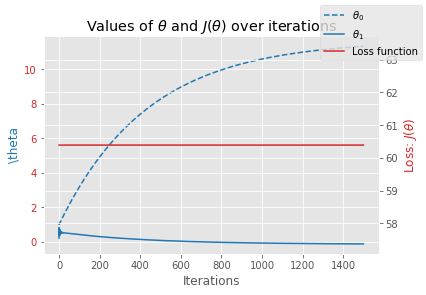

In [19]:
# import plotly_express as px
from mpl_toolkits import mplot3d
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


class GradientDescentExample(object):
    def __init__(self):
        init_notebook_mode(connected=True)
        x = proc.fit_transform(list(data[0]))
        y = proc.fit_transform(list(data[1]))

        data_sel = pd.array([x[:100], y[:100]])
        data_sel = pd.DataFrame.transpose(pd.DataFrame(data_sel))
        data_sel.columns = ["X", "y"]
        n_rows = data_sel.shape[0]
        X = data_sel["X"].to_numpy().reshape(n_rows, 1)
        ones = np.ones((n_rows, 1))

        self.X = np.concatenate((ones, X), axis=1)
        self.y = data_sel["y"].to_numpy().reshape(n_rows, 1)
        # self.u = data_sel[1].to_numpy().reshape(n_rows, 1)

    
    def compute_cost(self, theta=np.array(([0], [0]))):
        """ Given covariate matrix X, the prediction results y and coefficients theta, we compute the loss """
        m = len(self.y)
        j = 0 # Initialize loss to 0
        # Reshape theta
        theta = theta.reshape(2, 1)
        # Calculate the hypothesis - y_hat
        h_x = np.dot(self.X, theta)
        # Subtract y from y_hat, square and sum
        error_term = sum((h_x - self.y)**2)
        # Divide by twice the number of samples - standard practice
        loss = error_term / (2*m)
        
        return loss
    

    def gradient_descent(self, theta=np.array([[0], [0]]), eta=0.01, n_iter=1500):
        m = len(self.y)
        J_history = []
        theta0_history = []
        theta1_history = []
        theta = theta.reshape(2, 1)

        for _ in range(n_iter):
            error = (np.dot(self.X, theta) - self.y)
            term0 = (eta/m) * sum(error*self.X[:,0].reshape(m,1))
            term1 = (eta/m) * sum(error*self.X[:,1].reshape(m,1))

            # Update threshold
            term_vector = np.array([[term0], [term1]])
            theta = theta - term_vector.reshape(2, 1)

            # Store history values
            theta0_history.append(list(theta[0])[0])
            theta1_history.append(list(theta[1])[0])
            J_history.append(list(self.compute_cost())[0])

        return (theta, J_history, theta0_history, theta1_history)


if __name__ == "__main__":
    n_iter = 1500
    theta_init = np.array([[1],[1]])
    eta = 0.01
    theta, J_history, theta0_history, theta1_history = GradientDescentExample().gradient_descent(theta_init, eta, n_iter)

    fig, ax1 = plt.subplots()
    color="tab:blue"
    ax1.plot(theta0_history, label=r"$\theta_{0}$", linestyle="--", color=color)
    ax1.plot(theta1_history, label=r"$\theta_{1}$", linestyle="-", color=color)
    ax1.set_xlabel("Iterations")
    ax1.set_ylabel(r"\theta", color=color)
    ax1.tick_params(axis="y", labelcolor=color)
    
    color="tab:red"
    ax2 = ax1.twinx()
    ax2.plot(J_history, label="Loss function", color=color)
    ax2.set_title(r"Values of $\theta$ and $J(\theta)$ over iterations")
    ax2.set_ylabel(r"Loss: $J(\theta)$", color=color)
    ax1.tick_params(axis="y", labelcolor=color)
    
    fig.legend()

# Adaline SGD training model

In [20]:
class AdalineSGD(object):
    def __init__(self, eta=0.01, n_iter=50, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
    

    def fit(self, X, y):
        """ Fit training data """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for _ in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self


    def partial_fit(self, X, y):
        """ Fit training data without reinitializing the weights """
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    

    def _shuffle(self, X, y):
        """ Shuffle training data """
        # Generating a random sequence of uniue numbers with the length of y ranging from 0 to 100, 
        # using the permutation function in np.random. These numbers can then be used as indices to shuffle our feature matrix and class label vector 
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    

    def _initialize_weights(self, m):
        """ Initialize weights to small random numbers """
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1+m)
        self.w_initialized = True 
    

    def _update_weights(self, xi, target):
        """ Apply Adaline learning rule to update the weights """
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost


    def net_input(self, X):
        """ Calculate net input """
        return np.dot(X, self.w_[1:]) + self.w_[0]


    def activation(self, X):
        """ Compute linear activation """
        return X
    

    def predict(self, X):
        """ Return class label after unit step """
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# Conversion example; When a neural network reaches the peak of preciseness.

Text(0, 0.5, 'Amount of updates')

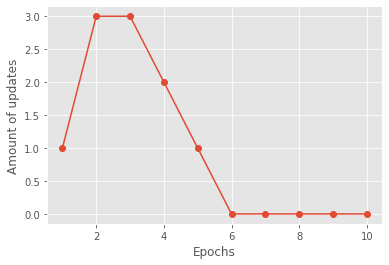

In [21]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Amount of updates")

# Convenience function to vizualize decision boundries for 2-dimensional datasets

<ipython-input-22-dce5ee33be8c>:18: UserWarning:

You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



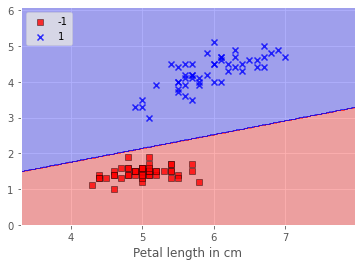

In [22]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # Plot decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Plot class example
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolors="black")

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel("Sepal length in cm")
plt.xlabel("Petal length in cm")
plt.legend(loc="upper left")
    

Text(0.5, 1.0, 'Learning rate 0.0001')

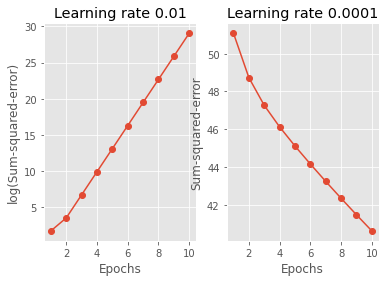

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ada = Adaline(n_iter=10, eta=0.01).fit(X, y)

ax[0].plot(range(1, len(ada.cost_) + 1), np.log10(ada.cost_), marker="o")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log(Sum-squared-error)")
ax[0].set_title("Learning rate 0.01")

ada0 = Adaline(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada0.cost_) + 1), ada0.cost_, marker="o")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Sum-squared-error")
ax[1].set_title("Learning rate 0.0001")

<ipython-input-22-dce5ee33be8c>:18: UserWarning:

You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



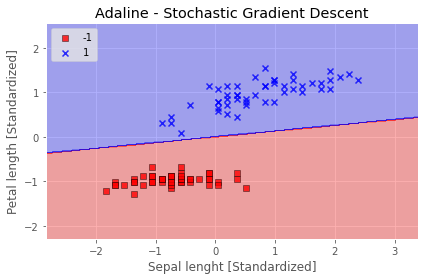

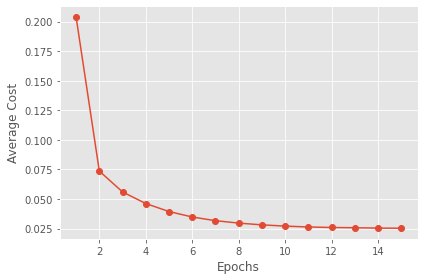

In [24]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title("Adaline - Stochastic Gradient Descent")
plt.xlabel("Sepal lenght [Standardized]")
plt.ylabel("Petal length [Standardized]")
plt.legend(loc="upper left")
plt.tight_layout()

plt.show()
plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Average Cost")
plt.tight_layout()
plt.show()